In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv(r'C:\Users\tesla\OneDrive\Desktop\AI-Artificial-Inteligence-\ML practice\Feature Engineering\movies rating.csv')

In [4]:
df.head()

,Unnamed: 0,Rank,Movie,World Profit,Gross,National View,Foreign Profit,International View
0,0,1,NaN,"$1,698,863,816","$652,980,194",38.4%,"$1,045,883,622",61.6%
1,1,2,NaN,"$1,338,073,645","$636,745,858",47.6%,"$701,327,787",52.4%
2,2,3,NaN,"$1,026,899,678","$450,182,382",43.8%,"$576,717,296",56.2%
3,3,4,NaN,"$969,126,452","$361,004,205",37.3%,"$608,122,247",62.7%
4,4,5,Domestic,"$717,365,125","$468,982,125",65.4%,"$248,383,000",34.6%


In [8]:
data=[]

In [16]:
st =[  'Gross', 'Foreign Profit','World Profit']
flt=['International View', 'National View']

for i in st:
    df[i] = df[i].astype(str).str.replace(r'[$,]', '', regex=True) \
                            .str.replace('%', '', regex=True) \
                            .replace('-', 0) \
                            .astype(float)

In [27]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [24]:
df.replace(0,np.nan,inplace=True)

In [28]:
df.isnull().mean()

Rank                  0.000
Movie                 0.020
World Profit          0.000
Gross                 0.345
National View         0.345
Foreign Profit        0.020
International View    0.020
dtype: float64

In [30]:
X = df.drop(columns=['National View'])
y = df['National View']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [32]:
X_train.shape, X_test.shape

((160, 6), (40, 6))

In [35]:
X_train.isnull().mean()

Rank                  0.00000
Movie                 0.01250
World Profit          0.00000
Gross                 0.35625
Foreign Profit        0.02500
International View    0.02500
dtype: float64

In [36]:
mean_Gross = X_train['Gross'].mean()
median_Gross = X_train['Gross'].median()

mean_Foreign_Profit = X_train['Foreign Profit'].mean()
median_Foreign_Profit = X_train['Foreign Profit'].median()

mean_International_View  = X_train['International View'].mean()
median_International_View  = X_train['International View'].median()

In [37]:
X_train['Gross_median'] = X_train['Gross'].fillna(mean_Gross)
X_train['Gross_mean'] = X_train['Gross'].fillna(mean_Gross)

X_train['ForeignP_median'] = X_train['Foreign Profit'].fillna(mean_Foreign_Profit)
X_train['ForeignP_mean'] = X_train['Foreign Profit'].fillna(mean_Foreign_Profit)

X_train['iView_median'] = X_train['International View'].fillna(mean_International_View)
X_train['iView_mean'] = X_train['International View'].fillna(mean_International_View)

In [39]:
X_train.head(2)

,Rank,Movie,World Profit,Gross,Foreign Profit,International View,Gross_median,Gross_mean,ForeignP_median,ForeignP_mean,iView_median,iView_mean
137,138,Doctor X: The Movie,14873918.0,14409169.0,464749.0,3.1,1.440917e+07,1.440917e+07,464749.0,464749.0,3.1,3.1
163,164,Niko: Beyond the Northern Lights,11227393.0,NaN,11227393.0,100.0,5.500852e+07,5.500852e+07,11227393.0,11227393.0,100.0,100.0


In [40]:
print('Original Gross variable variance: ', X_train['Gross'].var())
print('Gross Variance after median imputation: ', X_train['Gross_mean'].var())
print('Gross Variance after mean imputation: ', X_train['Gross_median'].var())

print('Original Foreign Profit variable variance: ', X_train['Foreign Profit'].var())
print('Foreign Profit Variance after median imputation: ', X_train['ForeignP_mean'].var())
print('Foreign Profit Variance after mean imputation: ', X_train['ForeignP_median'].var())

print('Original Fare variable variance: ', X_train['International View'].var())
print('Fare Variance after median imputation: ', X_train['iView_mean'].var())
print('Fare Variance after mean imputation: ', X_train['iView_median'].var())

Original Gross variable variance:  1.2132784238182654e+16
Gross Variance after median imputation:  7783295549022834.0
Gross Variance after mean imputation:  7783295549022834.0
Original Foreign Profit variable variance:  1.3523855375880002e+16
Foreign Profit Variance after median imputation:  1.3183632599128304e+16
Foreign Profit Variance after mean imputation:  1.3183632599128304e+16
Original Fare variable variance:  989.5642593052102
Fare Variance after median imputation:  964.6695609579098
Fare Variance after mean imputation:  964.6695609579098


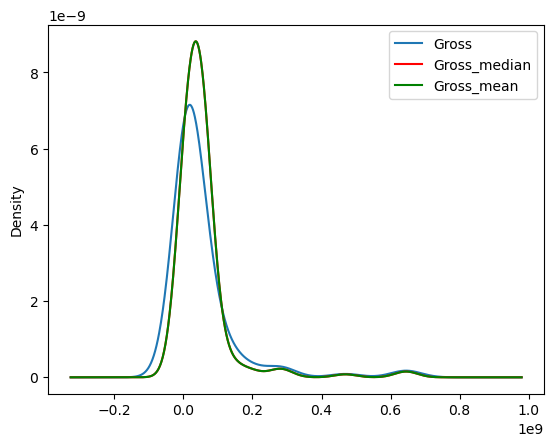

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Gross'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Gross_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Gross_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

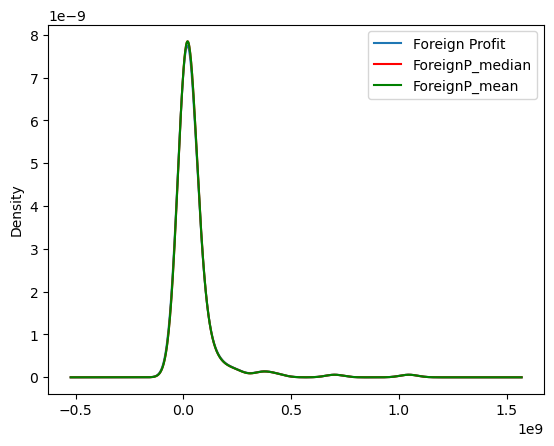

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Foreign Profit'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['ForeignP_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['ForeignP_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

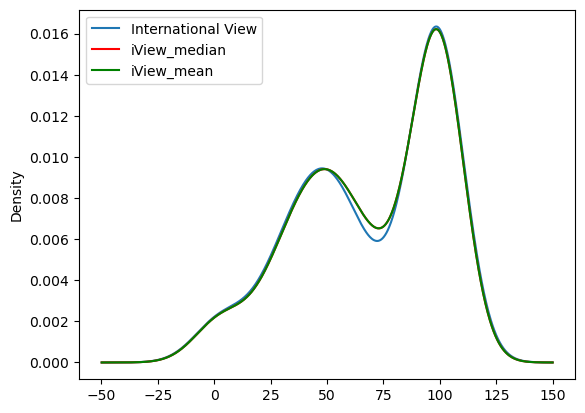

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['International View'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['iView_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['iView_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

<Axes: >

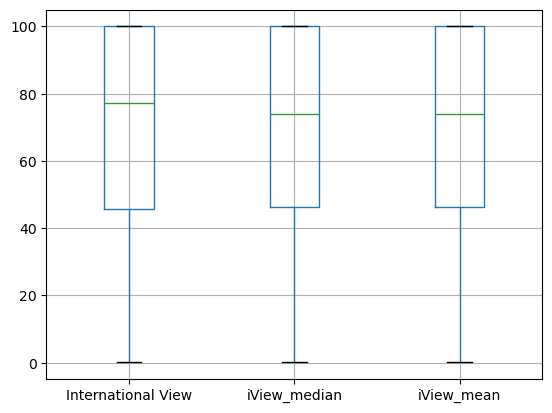

In [46]:
X_train[['International View', 'iView_median', 'iView_mean']].boxplot()

<Axes: >

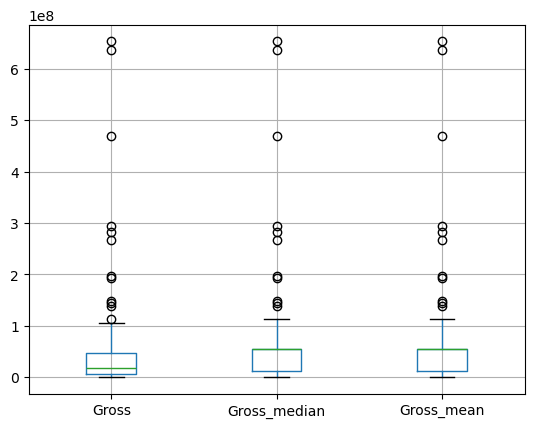

In [45]:
X_train[['Gross', 'Gross_median', 'Gross_mean']].boxplot()

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [48]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [51]:
X_train

,Rank,Movie,World Profit,Gross,Foreign Profit,International View
137,138,Doctor X: The Movie,14873918.0,14409169.0,464749.0,3.1
163,164,Niko: Beyond the Northern Lights,11227393.0,NaN,11227393.0,100.0
111,112,Wicked Little Letters,20590343.0,19512134.0,1078209.0,5.2
123,124,Pushpa: The Rule - Part 2,17520972.0,NaN,17520972.0,100.0
109,110,Chantal in Fairyland,20656654.0,20656654.0,NaN,NaN
...,...,...,...,...,...,...
43,44,Bob Marley: One Love,83677281.0,42777281.0,40900000.0,48.9
22,23,Dune: Part Two,201967521.0,113376590.0,88590931.0,43.9
72,73,"I, the Executioner",37164152.0,NaN,37164152.0,100.0
15,16,Foreign,372262265.0,267762265.0,104500000.0,28.1


In [52]:
trf = ColumnTransformer([
    ('imputer1',SimpleImputer(strategy='median'),['Gross']),
    ('imputer2',SimpleImputer(strategy='mean'),['International View','Foreign Profit'])
],remainder='passthrough')

In [53]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Gross']),
                                ('imputer2', SimpleImputer(),
                                 ['International View', 'Foreign Profit'])])

In [54]:
trf.named_transformers_['imputer1'].statistics_

array([17657658.])

In [55]:
trf.named_transformers_['imputer2'].statistics_

array([6.97711538e+01, 4.94928482e+07])